In [1]:
from pyvispoly import FieldNumber, Point, Polygon, PolygonWithHoles, VisibilityPolygonCalculator
from pyvispoly.plotting import plot_polygon

In [2]:
poly_a  = PolygonWithHoles(Polygon([Point(0, 0), Point(3, 0), Point(1, 1), Point(0, 1)]))
poly_b  =  PolygonWithHoles(Polygon([Point(1, 0), Point(2, 0), Point(2, 1), Point(1, 1)]))

In [3]:
float(poly_a.outer_boundary().area())

2.0000000000000004

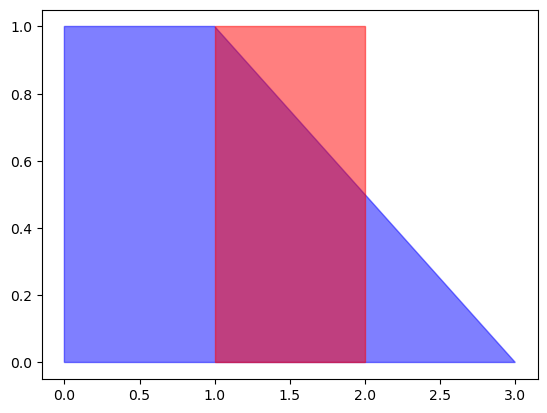

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_polygon(poly_a, ax=ax, alpha=0.5, color="blue")
plot_polygon(poly_b, ax=ax, alpha=0.5, color='red')
plt.show()

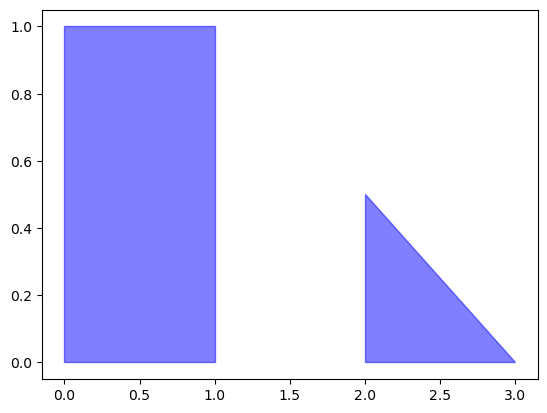

In [5]:
fig, ax = plt.subplots()
for poly in poly_a.difference(poly_b):
    plot_polygon(poly, ax=ax, alpha=0.5)
plt.show()


In [6]:
u_poly = PolygonWithHoles([Point(0,0), Point(0, 3), Point(1,3), Point(1, 1), Point(2, 1), Point(2, 3), Point(3, 3), Point(3, 0)][::-1])
float(u_poly.outer_boundary().area())

7.000000000000001

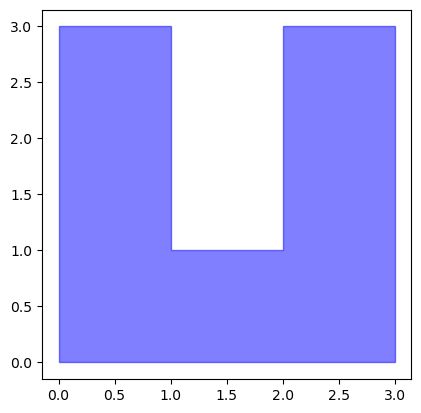

In [7]:
fig, ax = plt.subplots()
plot_polygon(u_poly, ax=ax, alpha=0.5, color="blue")
# equal aspect ratio
ax.set_aspect('equal', 'box')
plt.show()

In [40]:
vispoly = VisibilityPolygonCalculator(u_poly)
q = Point(0, 0.1)
visble = vispoly.compute_visibility_polygon(q)

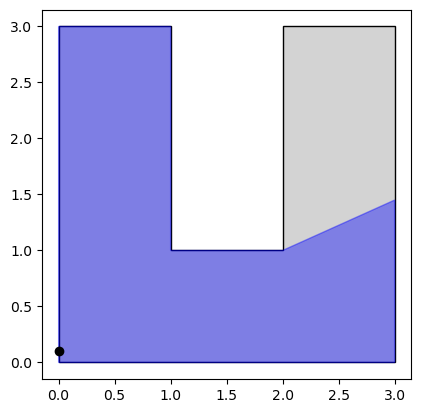

In [41]:
fig, ax = plt.subplots()
plot_polygon(u_poly, ax=ax, alpha=1.0, color="lightgrey", linewidth=1,edgecolor="black")
plot_polygon(visble, ax=ax, alpha=0.4, color="blue")
ax.plot(q.x(), q.y(), 'o', color='black')
# equal aspect ratio
ax.set_aspect('equal', 'box')
plt.show()

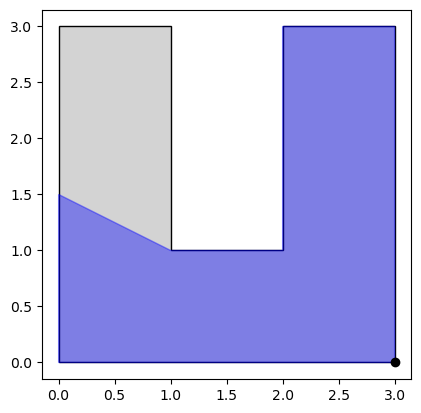

In [43]:
q = Point(3, 0)
visble = vispoly.compute_visibility_polygon(q)
fig, ax = plt.subplots()
#ax.set_facecolor("lightgrey")
plot_polygon(u_poly, ax=ax, alpha=1.0, color="lightgrey", linewidth=1,edgecolor="black")
plot_polygon(visble, ax=ax, alpha=0.4, color="blue")
assert visble.contains(q)
assert visble.contains(Point(2, 0))
assert not visble.contains(Point(0, 3))
ax.plot(q.x(), q.y(), 'o', color='black')
# equal aspect ratio
ax.set_aspect('equal', 'box')
plt.show()